### Advanced topics in machine learning - final project
### Shneor

In [1]:
!pip install wordcloud

In [303]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud


In [429]:
data = pd.read_csv("dailykos.csv")
data = data.drop('Document', axis=1)
data

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [430]:
data.isnull().sum().sort_values()

abandon       0
poll          0
politician    0
political     0
policies      0
             ..
fallujah      0
fall          0
faith         0
event         0
zone          0
Length: 1545, dtype: int64

###   KMEANS שלב א - חלוקת הדאטה לפי 

For n_clusters = 2, the average silhouette_score is : 0.2517539604671334
  - The SSE is: 817799.8968688044
For n_clusters = 4, the average silhouette_score is : 0.20531773656895744
  - The SSE is: 765550.89476285
For n_clusters = 6, the average silhouette_score is : 0.18197671708862415
  - The SSE is: 738039.1440610389
For n_clusters = 8, the average silhouette_score is : 0.14081664327760854
  - The SSE is: 722878.4039249453


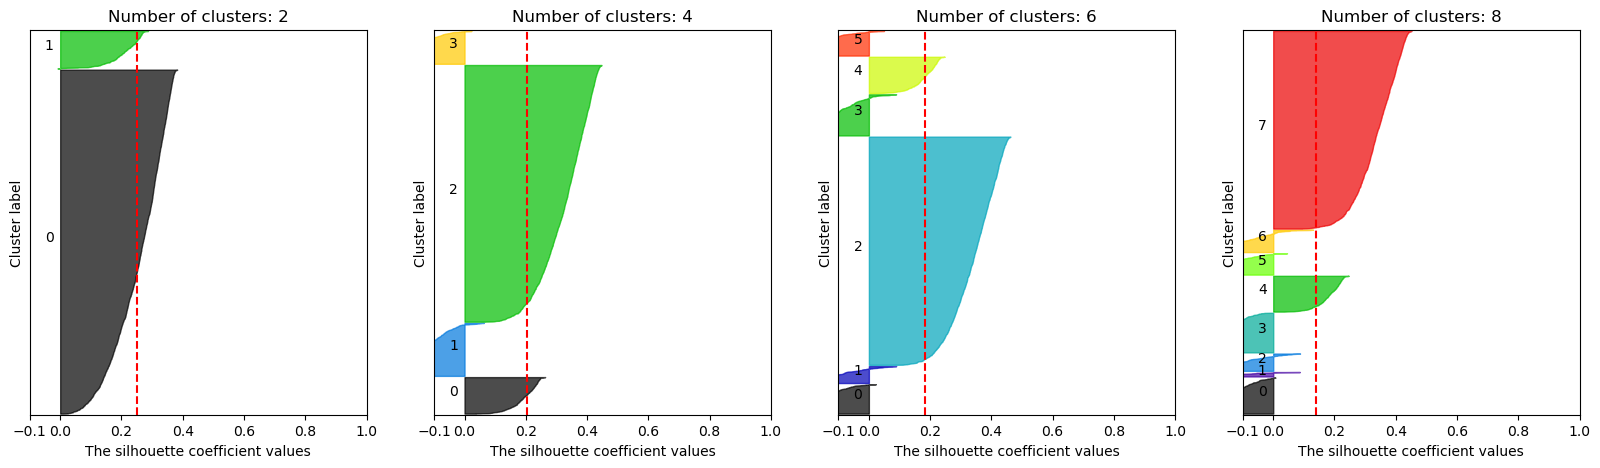

In [431]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))

for idx, n_clusters in enumerate([2, 4, 6, 8]):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, kmeans_labels)
    sse = kmeans.inertia_
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")
    print(f"  - The SSE is: {sse}")

    ax = axs[idx]
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])
    ax.set_title(f"Number of clusters: {n_clusters}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    silhouette_values = silhouette_samples(data, kmeans_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

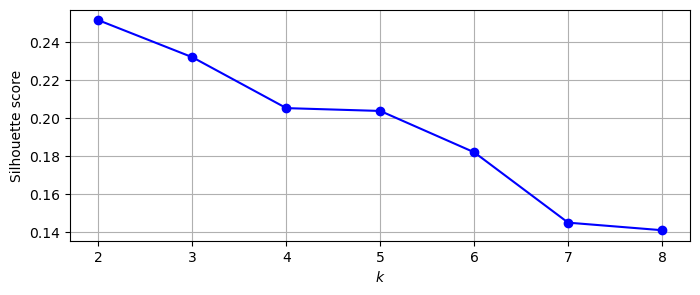

In [432]:
silhouette_scores = [silhouette_score(data, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 9), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

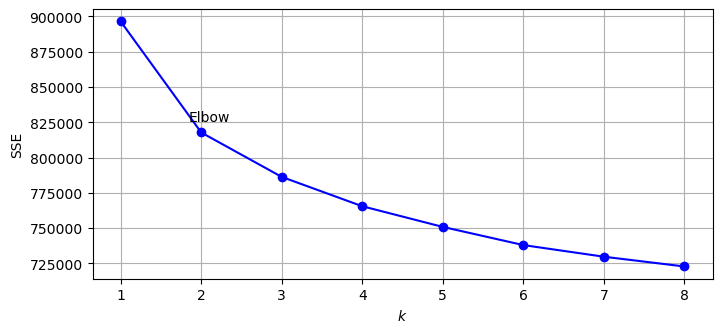

In [433]:
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300,  random_state=42).fit(data)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 9), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("SSE")
plt.text(2.1, 826000, "Elbow", horizontalalignment="center")
plt.grid()
plt.show()

###   DBSCAM שלב ב - חלוקת הדאטה לפי  

In [434]:
import pandas as pd

results = []

for eps in range(7,11):
    for min_samples in range(20,60,5):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        if n_clusters > 2:
            silhouette_avg = silhouette_score(data, dbscan_labels)
            cluster_sizes = pd.Series(dbscan_labels).value_counts()
            smallest_cluster_size = cluster_sizes.min()
            n_noise_samples = cluster_sizes.get(-1, 0)
            
            results.append({
                'min_samples': min_samples,
                'eps': eps,
                'n_clusters': n_clusters,
                'silhouette_avg': silhouette_avg,
                'smallest_cluster_size': smallest_cluster_size,
                'n_noise_samples': n_noise_samples
            })

results_df = pd.DataFrame(results)
results_df

,min_samples,eps,n_clusters,silhouette_avg,smallest_cluster_size,n_noise_samples
0,20,7,3,-0.201523,20,3005
1,20,8,4,-0.112448,19,2642
2,25,8,3,-0.115529,34,2664
3,25,9,3,-0.049237,64,2364
4,30,9,3,-0.051314,55,2376
5,35,9,3,-0.052901,46,2385
6,50,10,3,0.002169,39,2088


In [435]:
min_samples_values = [2,3,21]
eps_values = [1.5,5,10,11,15,16,17,20]  
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        n_noise = list(dbscan_labels).count(-1)
        cluster_counts = pd.Series(dbscan_labels).value_counts()
        n_outliers = cluster_counts.get(-1, 0)

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_outliers': n_outliers
        })

results_df = pd.DataFrame(results)

results_df


,eps,min_samples,n_clusters,n_outliers
0,1.5,2,0,3430
1,1.5,3,0,3430
2,1.5,21,0,3430
3,5.0,2,29,3333
4,5.0,3,8,3375
5,5.0,21,0,3430
6,10.0,2,20,2027
7,10.0,3,2,2063
8,10.0,21,2,2068
9,11.0,2,13,1778


In [436]:
for eps in [16]:
    for min_samples in [2,3,21]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        print(f"For min_samples = {min_samples}, eps = {eps}: number of clusters: {n_clusters}")

        if n_clusters > 1:  
            silhouette_avg = silhouette_score(data, dbscan_labels)
            print(f"Silhouette Score is {silhouette_avg}")

For min_samples = 2, eps = 16: number of clusters: 9
Silhouette Score is 0.14576005924345706
For min_samples = 3, eps = 16: number of clusters: 2
Silhouette Score is 0.18973641496739918
For min_samples = 21, eps = 16: number of clusters: 2
Silhouette Score is 0.18976284432575555


In [437]:
data.head(1)

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [438]:
dbscan = DBSCAN(min_samples =3, eps =16)
data['dbscan_cluster'] = dbscan.fit_predict(data)


kmeans = KMeans(n_clusters=2,init='k-means++', n_init=10, max_iter=300,  random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data)

In [439]:
data.head(1)

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yesterday,york,youll,young,youre,youve,zogby,zone,dbscan_cluster,kmeans_cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [440]:
kmeans_cluster_sizes = data['kmeans_cluster'].value_counts()
dbscan_cluster_sizes = data['dbscan_cluster'].value_counts()

kmeans_max_cluster = kmeans_cluster_sizes.idxmax()
kmeans_max_size = kmeans_cluster_sizes.max()
kmeans_min_cluster = kmeans_cluster_sizes.idxmin()
kmeans_min_size = kmeans_cluster_sizes.min()

dbscan_max_cluster = dbscan_cluster_sizes.idxmax()
dbscan_max_size = dbscan_cluster_sizes.max()
dbscan_min_cluster = dbscan_cluster_sizes.idxmin()
dbscan_min_size = dbscan_cluster_sizes.min()

print(f"K-Means: Largest Cluster: {kmeans_max_cluster} ({kmeans_max_size} samples), Smallest Cluster: {kmeans_min_cluster} ({kmeans_min_size} samples)")
print(f"DBSCAN: Largest Cluster: {dbscan_max_cluster} ({dbscan_max_size} samples), Smallest Cluster: {dbscan_min_cluster} ({dbscan_min_size} samples)")


K-Means: Largest Cluster: 0 (3092 samples), Smallest Cluster: 1 (338 samples)
DBSCAN: Largest Cluster: 0 (2360 samples), Smallest Cluster: 1 (248 samples)


In [441]:
data.groupby('dbscan_cluster')['dbscan_cluster'].count()

dbscan_cluster
-1     822
 0    2360
 1     248
Name: dbscan_cluster, dtype: int64

In [442]:
data.groupby('kmeans_cluster')['kmeans_cluster'].count()

kmeans_cluster
0    3092
1     338
Name: kmeans_cluster, dtype: int64

In [443]:
for cluster in data['kmeans_cluster'].unique():
    cluster_data = data[data['kmeans_cluster'] == cluster]
    cluster_data.to_csv(f'kmeans_cluster_{cluster}.csv', index=False)

for cluster in data['dbscan_cluster'].unique():
    if cluster == -1:  # דילוג על רעש
        continue
    cluster_data = data[data['dbscan_cluster'] == cluster]
    cluster_data.to_csv(f'dbscan_cluster_{cluster}.csv', index=False)


In [444]:
def create_word_cloud(cluster_data, cluster_label):
    cluster_data_without_cluster = cluster_data.drop(columns='dbscan_cluster')
    
    word_frequencies = cluster_data_without_cluster.sum(axis=0).sort_values(ascending=False)[:5]
    
    print(f"Top words in {cluster_label}:")
    print(word_frequencies)
    print()  # רווח בין אשכולות שונים
    
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(word_frequencies)
    
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {cluster_label}')
    plt.show()

Top words in DBSCAN Cluster 0:
bush          3961
kerry         2808
poll          2144
democrat      1923
republican    1400
dtype: int64



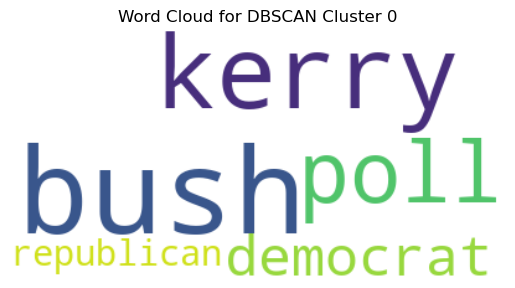

Top words in DBSCAN Cluster 1:
november     2568
poll         1170
vote         1028
challenge    1009
democrat      656
dtype: int64



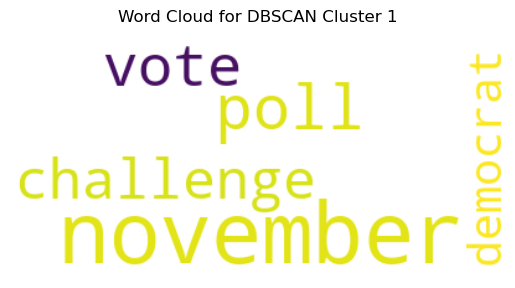

In [445]:
for cluster in set(data['dbscan_cluster']):
    if cluster == -1:  # דילוג על רעש
        continue
    cluster_data = data[data['dbscan_cluster'] == cluster]
    create_word_cloud(cluster_data, f'DBSCAN Cluster {cluster}')

Top words in K-Means Cluster 0:
bush        6878
kerry       4488
democrat    3760
poll        3160
state       2718
dtype: int64



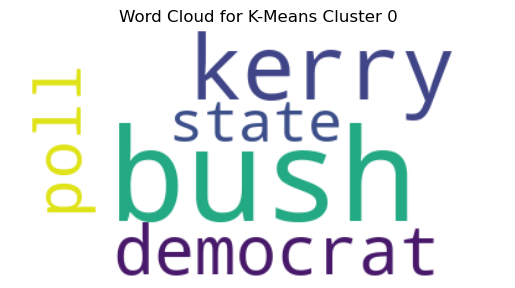

Top words in K-Means Cluster 1:
november     3438
poll         1658
vote         1496
challenge    1387
democrat     1093
dtype: int64



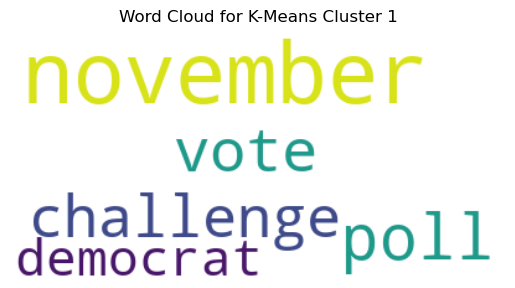

In [446]:
for cluster in range(kmeans.n_clusters):
    cluster_data = data[data['kmeans_cluster'] == cluster]
    create_word_cloud(cluster_data, f'K-Means Cluster {cluster}')

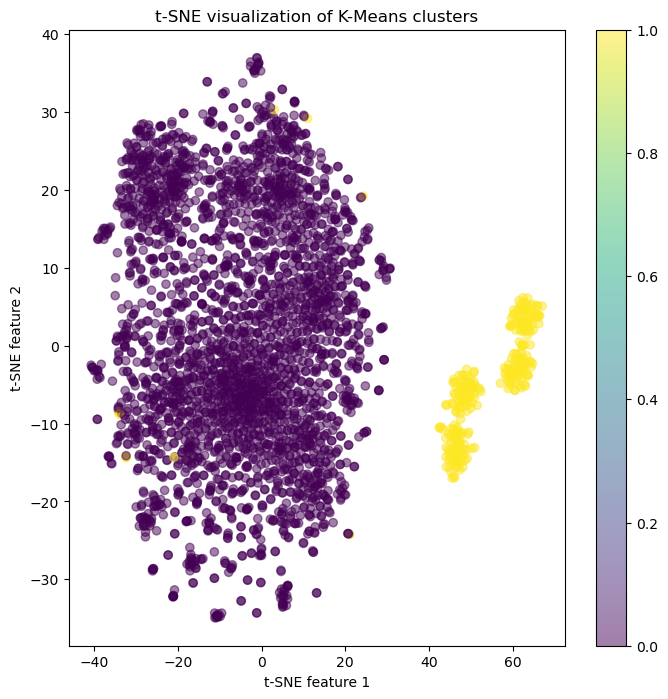

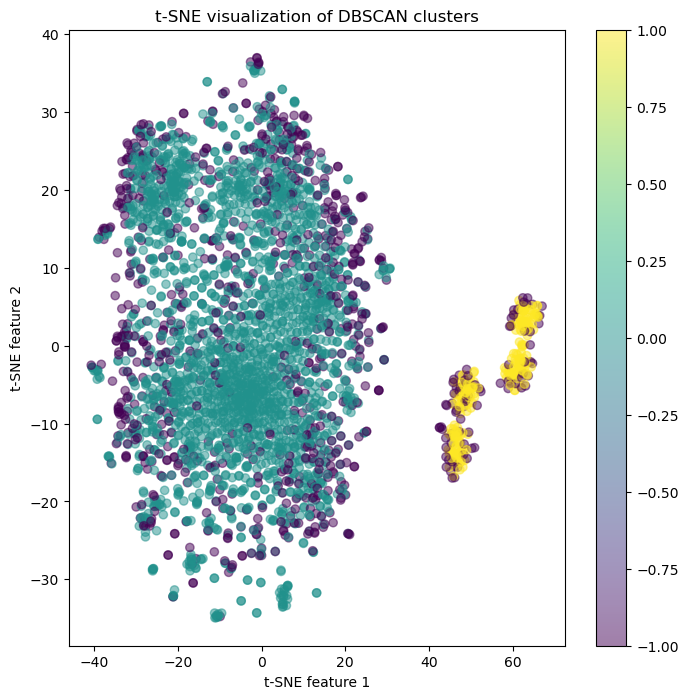

In [447]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data.drop(['kmeans_cluster', 'dbscan_cluster'], axis=1))

plt.figure(figsize=(8, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data['kmeans_cluster'], cmap='viridis', alpha=0.5)
plt.title('t-SNE visualization of K-Means clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data['dbscan_cluster'], cmap='viridis', alpha=0.5)
plt.title('t-SNE visualization of DBSCAN clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()
plt.show()

In [460]:
data = pd.read_csv("dailykos.csv")
data = data.drop('Document', axis=1)

pca = PCA(n_components=0.8)
data_pca = pca.fit_transform(data)

explained_variance = pca.explained_variance_ratio_.cumsum()
num_features = sum(explained_variance <= 0.8) +1

remaining_features = data.columns[pca.components_[:num_features].argmax(axis=1)]

new_data_after_pca = pd.DataFrame(data_pca[:, :num_features], columns=remaining_features)
new_data_after_pca

,november,bush,democrat,democrat,dean,poll,kerry,democrat,parties,vote,...,announce,hit,charge,hope,richard,fire,happen,aug,nominate,thought
0,-0.680498,1.093079,-1.783941,0.115340,0.529821,2.896440,2.084852,0.968852,0.461510,0.572898,...,0.338226,-0.242228,-0.124755,0.102532,0.035007,-0.249151,-0.262387,0.148705,0.427790,0.277194
1,-2.507712,0.571606,-0.582923,-4.126820,0.162047,0.313508,4.985346,0.311795,-0.176095,-0.825381,...,-0.346149,-0.084575,-0.329558,0.104683,-0.001205,-0.066473,0.131636,-0.251987,-0.143346,-0.524575
2,12.746635,-5.538403,-3.423072,-1.229663,-0.741467,-0.518924,1.314264,-2.322604,-0.269792,2.523919,...,-0.069694,-0.049875,0.020551,0.120097,-0.211850,-0.188280,-0.024748,0.062697,-0.169477,0.002359
3,-2.691393,-1.624464,0.233585,1.406075,0.219278,-0.597418,0.086045,-1.448404,-1.247522,-4.473058,...,0.547917,-0.116385,-0.204845,-0.595132,-0.474568,0.777694,0.028492,0.111890,-0.212816,-0.517127
4,1.699824,10.360307,-2.743075,-2.371096,-2.897381,-0.213029,-1.039699,-0.033287,-0.169541,-1.161971,...,-0.317483,0.127875,-0.197723,0.249402,-0.105102,-0.769951,0.116486,0.037264,-0.774683,-0.676795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,1.394343,2.477964,-0.829572,-4.252391,-2.295050,3.780879,-1.556714,-2.424553,1.494288,0.097991,...,-0.088239,0.235252,-0.362333,0.295846,0.325830,0.070483,0.093351,-0.061655,0.158397,0.028801
3426,-2.644729,-0.895729,-1.497717,-1.313820,-1.477213,-0.057582,-0.024948,-1.171262,0.317186,1.231692,...,-0.001253,-0.085899,-0.229952,-0.064402,-0.010179,0.117400,0.014665,0.061066,0.158751,0.005838
3427,-2.150860,1.148500,-2.823820,-0.142743,-1.470044,-1.596592,-2.017050,-0.012346,0.258913,0.275101,...,-0.620246,-0.352904,-0.435360,-0.097850,0.339489,-0.094971,0.358006,-0.244797,-0.049364,0.295813
3428,-2.313739,-0.529056,-0.813233,0.347606,-1.816844,-0.165155,-1.226921,1.092167,-1.501000,0.249390,...,-0.083538,-0.402732,0.176888,-0.013579,0.176291,-0.012897,0.025905,0.097774,0.406498,-0.100653


In [461]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.80) + 1

print(f" מספר הרכיבים הנדרשים כדי להסביר 80% מהווריאנס הוא : {num_components}")
print(f"מספר המאפיינים שנפלו בתהליך: {data.shape[1] - num_components}")

 מספר הרכיבים הנדרשים כדי להסביר 80% מהווריאנס הוא : 275
מספר המאפיינים שנפלו בתהליך: 1270


In [464]:
X = new_data_after_pca

In [465]:
dbscan = DBSCAN(min_samples =3, eps = 16)
X['dbscan_cluster'] = dbscan.fit_predict(new_data_after_pca)

In [466]:
for eps in [16]:
    for min_samples in [2,3,21]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        print(f"For min_samples = {min_samples}, eps = {eps}: number of clusters: {n_clusters}")

        if n_clusters > 1:  
            silhouette_avg = silhouette_score(data, dbscan_labels)
            print(f"Silhouette Score is {silhouette_avg}")

For min_samples = 2, eps = 16: number of clusters: 3
Silhouette Score is 0.23322486934924136
For min_samples = 3, eps = 16: number of clusters: 1
For min_samples = 21, eps = 16: number of clusters: 1


In [470]:
filtered_data = X[X['dbscan_cluster'] != -1]

dbscan_cluster_sizes = filtered_data['dbscan_cluster'].value_counts()

dbscan_max_cluster = dbscan_cluster_sizes.idxmax()
dbscan_max_size = dbscan_cluster_sizes.max()
dbscan_min_cluster = dbscan_cluster_sizes.idxmin()
dbscan_min_size = dbscan_cluster_sizes.min()

print(f"DBSCAN: Largest Cluster: {dbscan_max_cluster} ({dbscan_max_size} samples), Smallest Cluster: {dbscan_min_cluster} ({dbscan_min_size} samples)")

DBSCAN: Largest Cluster: 0 (3029 samples), Smallest Cluster: 0 (3029 samples)


In [468]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(X.drop(['dbscan_cluster'], axis=1))

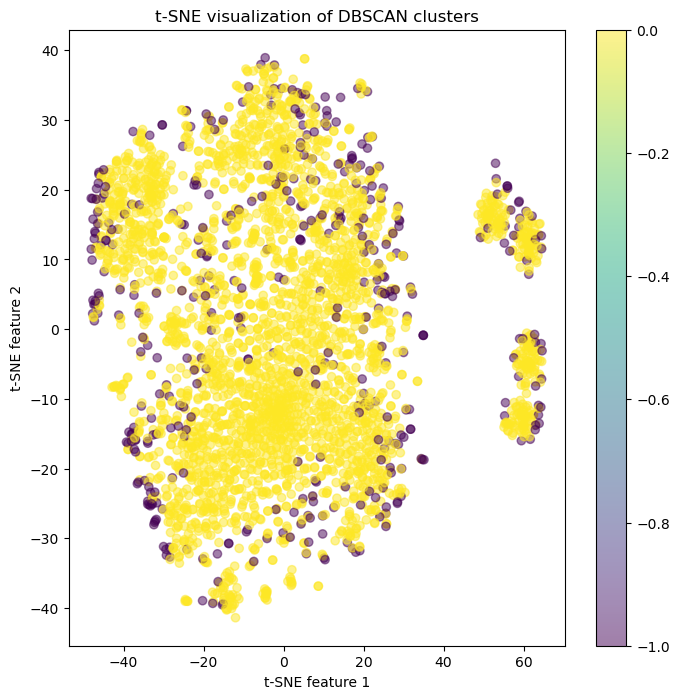

In [469]:
plt.figure(figsize=(8, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=X['dbscan_cluster'], cmap='viridis', alpha=0.5)
plt.title('t-SNE visualization of DBSCAN clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()
plt.show()

In [450]:
import pandas as pd

results = []

for eps in range(6,9):
    for min_samples in range(20,55,5):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(new_data_after_pca)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        if n_clusters > 2:
            silhouette_avg = silhouette_score(new_data_after_pca, dbscan_labels)
            cluster_sizes = pd.Series(dbscan_labels).value_counts()
            smallest_cluster_size = cluster_sizes.min()
            n_noise_samples = cluster_sizes.get(-1, 0)
            
            results.append({
                'min_samples': min_samples,
                'eps': eps,
                'n_clusters': n_clusters,
                'silhouette_avg': silhouette_avg,
                'smallest_cluster_size': smallest_cluster_size,
                'n_noise_samples': n_noise_samples
            })

results_df = pd.DataFrame(results)
results_df

,min_samples,eps,n_clusters,silhouette_avg,smallest_cluster_size,n_noise_samples
0,20,6,4,-0.075270,21,2480
1,25,6,3,-0.081605,26,2511
2,25,7,3,0.012082,65,2127
3,30,7,3,0.009874,58,2138
4,35,7,3,0.003296,35,2171
5,35,8,3,0.084886,70,1808
6,40,8,3,0.082923,60,1811
7,45,8,3,0.082203,65,1821
8,50,8,3,0.077963,51,1838


In [451]:
new_data_after_pca_and_db = new_data_after_pca
dbscan = DBSCAN(min_samples =35, eps =8)
new_data_after_pca_and_db['dbscan_cluster'] = dbscan.fit_predict(new_data_after_pca)

In [452]:
filtered_data = new_data_after_pca_and_db[new_data_after_pca_and_db['dbscan_cluster'] != -1]

dbscan_cluster_sizes = filtered_data['dbscan_cluster'].value_counts()

dbscan_max_cluster = dbscan_cluster_sizes.idxmax()
dbscan_max_size = dbscan_cluster_sizes.max()
dbscan_min_cluster = dbscan_cluster_sizes.idxmin()
dbscan_min_size = dbscan_cluster_sizes.min()

print(f"DBSCAN: Largest Cluster: {dbscan_max_cluster} ({dbscan_max_size} samples), Smallest Cluster: {dbscan_min_cluster} ({dbscan_min_size} samples)")

DBSCAN: Largest Cluster: 0 (1465 samples), Smallest Cluster: 1 (70 samples)


In [453]:
new_data_after_pca_and_db.groupby('dbscan_cluster')['dbscan_cluster'].count()

dbscan_cluster
-1    1808
 0    1465
 1      70
 2      87
Name: dbscan_cluster, dtype: int64

Top words in DBSCAN Cluster 0:
vote        378.481421
democrat    370.604950
carson       97.354622
time         73.381365
job          65.080851
dtype: float64



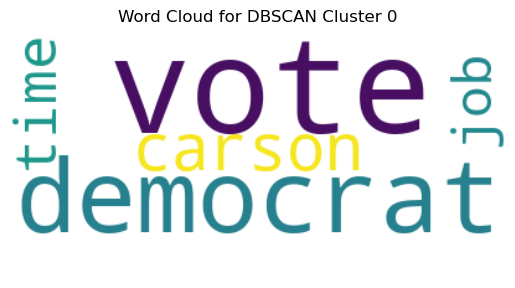

Top words in DBSCAN Cluster 1:
november    884.111330
vote         83.520217
report       82.957057
kerry        80.486171
job          60.935552
dtype: float64



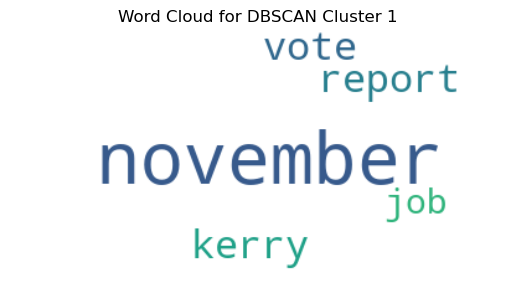

Top words in DBSCAN Cluster 2:
november    1070.731318
democrat     165.455951
state        143.469594
percent      102.950463
dean          84.657255
dtype: float64



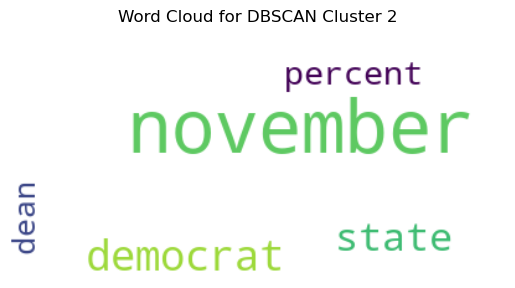

In [454]:
for cluster in set(new_data_after_pca_and_db['dbscan_cluster']):
    if cluster == -1:
        continue
    cluster_data = new_data_after_pca_and_db[new_data_after_pca_and_db['dbscan_cluster'] == cluster]
    create_word_cloud(cluster_data, f'DBSCAN Cluster {cluster}')

In [455]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(new_data_after_pca_and_db.drop(['dbscan_cluster'], axis=1))

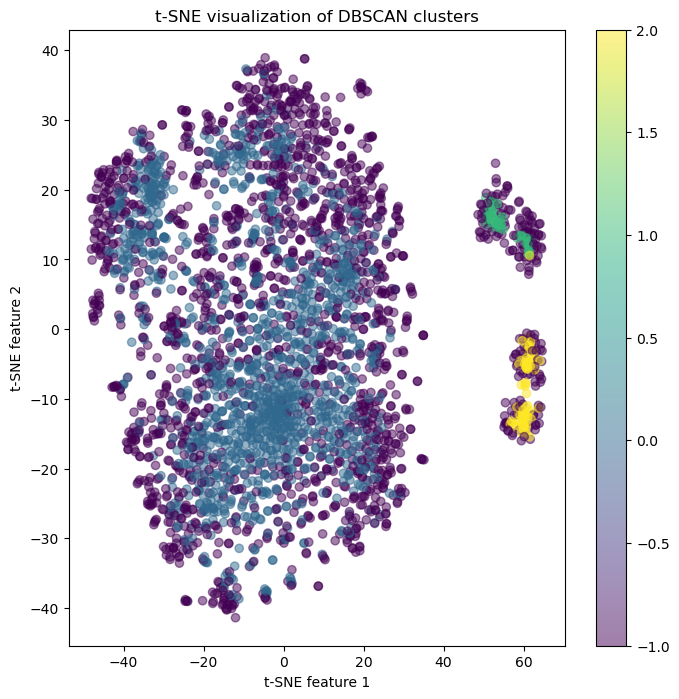

In [456]:
plt.figure(figsize=(8, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=new_data_after_pca_and_db['dbscan_cluster'], cmap='viridis', alpha=0.5)
plt.title('t-SNE visualization of DBSCAN clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar()
plt.show()

## Thank you very much!